In [6]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def make_pinwheel_data(radial_std, tangential_std, num_classes, num_per_class, rate):
    rads = np.linspace(0, 2*np.pi, num_classes, endpoint=False)

    features = npr.randn(num_classes*num_per_class, 2) \
        * np.array([radial_std, tangential_std])
    features[:,0] += 1.
    labels = np.repeat(np.arange(num_classes), num_per_class)

    angles = rads[labels] + rate * np.exp(features[:,0])
    rotations = np.stack([np.cos(angles), -np.sin(angles), np.sin(angles), np.cos(angles)])
    rotations = np.reshape(rotations.T, (-1, 2, 2))

    return 10*npr.permutation(np.einsum('ti,tij->tj', features, rotations))

In [8]:
num_clusters = 5           # number of clusters in pinwheel data
samples_per_cluster = 100  # number of samples per cluster in pinwheel
K = 15                     # number of components in mixture model
N = 2                      # number of latent dimensions
P = 2 

In [9]:
# generate synthetic data
data = make_pinwheel_data(0.3, 0.05, num_clusters, samples_per_cluster, 0.25)

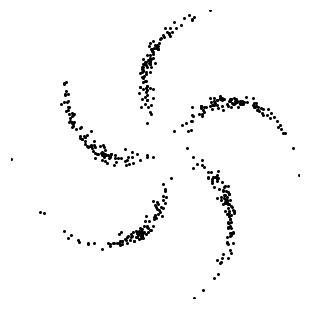

In [10]:
markersize = 4
def make_figure():
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.axis('off')
    fig.tight_layout()
    fig.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    ax.margins(0, 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    return fig, ax

def plot_data(data):
    fig, ax = make_figure()
    ax.plot(data[:,0], data[:,1], 'k.', markersize=markersize)
#     save_figure(fig, 'figures/mainfig_mix_data')
#     plt.close()
plot_data(data)

In [11]:
data.shape

(500, 2)